In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

### Задание 1. 
Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [2]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [3]:
def eval_logistic_regression(alpha, n_iter, gd_type='gd', lambda_=0 ):
    W = np.ones(X.shape[1])
    cost_history = []
    for i in range(n_iter):
        if gd_type == 'gd':             
            y_pred = np.dot(X, W)
            err = calc_mse(y, y_pred) + lambda_ * np.dot(W.T, W)
            W -= alpha * 2 / n * (np.dot(X.T,(y_pred - y)) + lambda_ * W)            
            
        elif gd_type == 'sgd': 
            train_ind = np.random.randint(X.shape[0])
            y_pred = np.dot(X[train_ind], W)
            err = calc_mse(y[train_ind], y_pred) + lambda_ * np.dot(W.T, W)
            W -= alpha * 2 / n * (np.dot(X[train_ind].T, (y_pred - y[train_ind])) + lambda_ * W)            
            
        cost_history.append(err)
    return cost_history

In [4]:
def plot(lambda_=0):
    alpha = 0.4
    n_iter = 1000

    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.scatter(range(n_iter), eval_logistic_regression(alpha, n_iter, 'gd', lambda_), s=20, c='b', marker="s", 
                label='gradient descent')
    ax1.scatter(range(n_iter), eval_logistic_regression(alpha, n_iter, 'sgd', lambda_), s=2, c='r', marker="o", 
                label='sgd')
    if lambda_==0:
        title = 'MSE'
    else:
        title = 'MSE with L2-regularization'

    plt.title(title)
    plt.xlabel('Iteration number')
    plt.ylabel(title)
    plt.legend(loc='upper right');
    plt.show()    

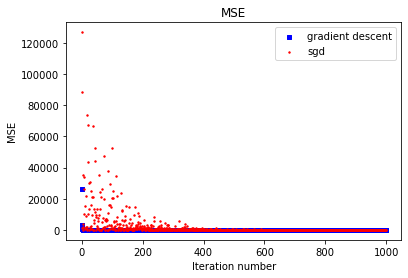

In [5]:
X, y = make_regression(n_samples=100, n_features=15, random_state=42)
n = X.shape[0]
plot(lambda_=0)

Скорость сходимости стохастического градиентного спуска значительно ниже, чем у градиентного спуска

### Задание 2.
Модифицировать решение первого задания путем добавления  L2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

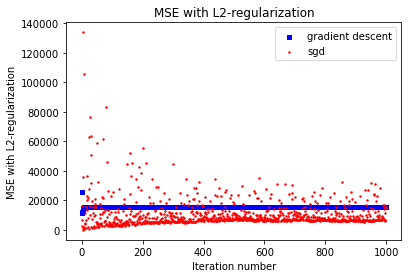

In [6]:
plot(lambda_=0.5)

* Добавлениe L2-регуляризации замедляет сходимость стохастического градиентного спуска значительно в большей степени, чем сходимость градиентного спуска.
* Чем выше lambda, тем ниже скорость сходимости стохастического градиентного спуска и выше разброс ошибки.
* При использовании L2-регуляризации, сумма MSE и нормы вектора весов, по большей части, ниже при стохастическом градиентном спуске, чем при градиентном спуске.